<a href="https://colab.research.google.com/github/badrinarayanan02/Computer-Vision/blob/main/2348507_ExtractingFeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feature Extraction**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

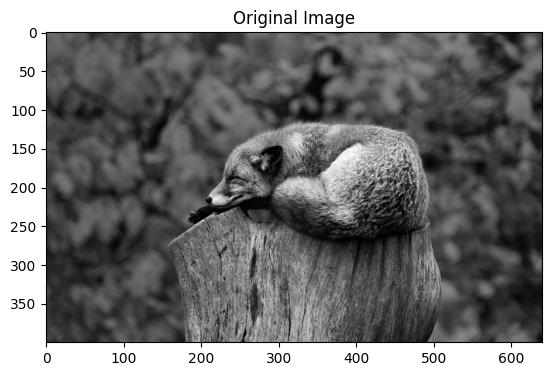

In [3]:
image = cv2.imread('/content/sleepyFox.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

**Inference**

Displayed the original image in grayscale

# Point Detection

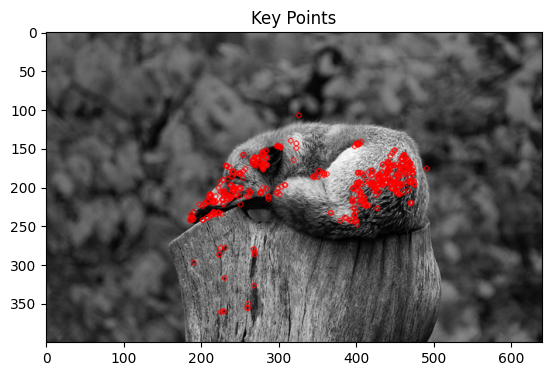

In [7]:
orb = cv2.ORB_create()
keypoints = orb.detect(image, None)

keypoint_image = cv2.drawKeypoints(image, keypoints, None, color=(255,0,0), flags=0)
plt.imshow(keypoint_image)
plt.title('Key Points')
plt.show()

**Inference**

Detected key points in the image using ORB (Oriented fast and rotated brief). It is better than SIFT and SURF.

Object recognition and tracking, Augmented Reality, Medical image analysis these are some of the applications of detecting key points from the image.

# Edge Detection

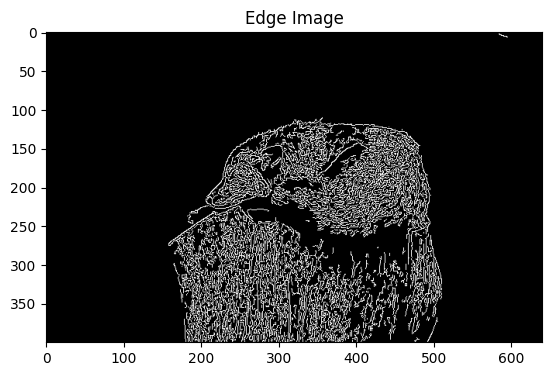

In [8]:
edges = cv2.Canny(image, 100, 200) # Upper and lower threshold

plt.imshow(edges, cmap='gray')
plt.title('Edge Image')
plt.show()

**Inference**

Detected the edge feature of the image by using canny edge detection technique.

Edge Detection involves identifying significant transitions in intensity in an image. These transitions corresponds to object boundaries, lines etc.


# Line Detection

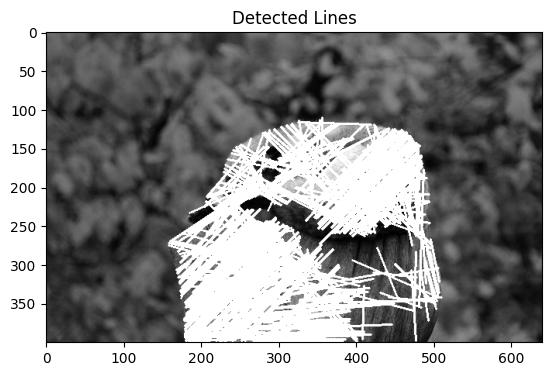

In [6]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=50, maxLineGap=10)

line_image = image.copy()
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.imshow(line_image, cmap='gray')
plt.title('Detected Lines')
plt.show()

**Inference**

Detected the lines by using HoughLines transform technique. Detecting lines involves identifying the structure or outline of objects within images by recognizing straight lines, which can be crucial for further analysis or processing.

Line detection can be useful in medical imaging, tracking road lanes etc.

Detecting horizontal and vertical lines using HoughLines Transform

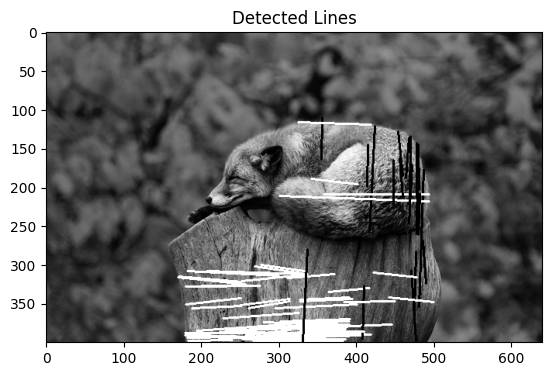

In [13]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=50, maxLineGap=10)

line_image = image.copy()

tolerance = 10

for line in lines:
    x1, y1, x2, y2 = line[0]
    if abs(y2 - y1) < tolerance:  # Horizontal line
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 2)
    elif abs(x2 - x1) < tolerance:  # Vertical line
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines')
plt.show()

Detecting Angles

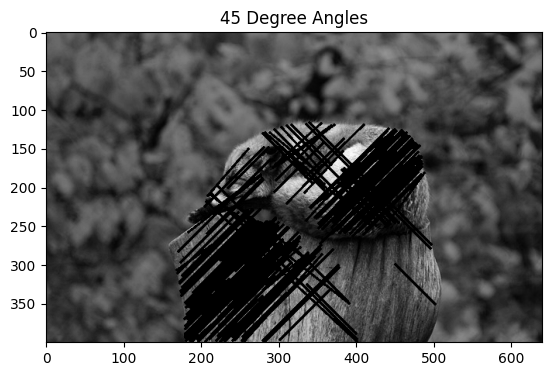

In [11]:
def line_angle(x1, y1, x2, y2):
    return np.degrees(np.arctan2(y2 - y1, x2 - x1))

angle_image = image.copy()
for line in lines:
    x1, y1, x2, y2 = line[0]
    angle = line_angle(x1, y1, x2, y2)
    if abs(angle - 45) <= 10 or abs(angle + 45) <= 10:
        cv2.line(angle_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(angle_image, cmap='gray')
plt.title('45 Degree Angles')
plt.show()

**Inference**

Detected the angles in respective degrees.

# **Conclusion**

Thus the task to extract feature descriptors from the image has been implemented successfully. Extracted features like edges, lines and points etc. Used detection techniques like ORB for points detection and canny for edge detection. Used HoughLineTransform for line detection.